In [24]:
import pandas as pd
import glob
import re
# !pip install vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import nltk
# nltk.download('vader_lexicon')

file_names = glob.glob('/Users/abhishek/Desktop/PSU_Courses/CE 597 Public transportation/Project/tweets/*.csv')

dfs = []
for file_name in file_names:
    df = pd.read_excel(file_name)
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)
df_all.drop_duplicates(subset=["Tweet", "User Description"], inplace=True)
df_all = df_all.reset_index(drop=True)
df_all['Tweet'] = df_all['Tweet'].astype(str)

In [28]:
def remove_links(tweet):
    return re.sub(r'http\S+|www\S+', '', tweet)

df_all['Tweet_new'] = df_all['Tweet'].apply(remove_links)
df_all['Tweet_new'].isna().sum()

0

In [32]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return (sentiment_dict['neg'], sentiment_dict['neu'], sentiment_dict['pos'], sentiment_dict['compound'])

df_all[['Negative', 'Neutral', 'Positive','Compound']] = df_all['Tweet_new'].apply(sentiment_scores).apply(pd.Series)

# df_all.to_csv('tweets_with_sentiment_scores.csv', index=False)
print (df_all['Compound'].isna().sum())

0


In [33]:
df_all.to_csv('tweets_with_sentiment_scores_07.17.csv', index=False)

In [26]:
import pandas as pd
import glob

file_names = glob.glob('/Users/abhishek/Desktop/PSU_Courses/CE 597 Public transportation/Project/sentiment_analysis_csv/*.csv')
dfs = []

# Loop over the file names and read each file as a dataframe
for file_name in file_names:
    print (file_name)
    df = pd.read_csv(str(file_name),delimiter=',',lineterminator='\n', encoding='utf-8')
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

len(data)

/Users/abhishek/Desktop/PSU_Courses/CE 597 Public transportation/Project/sentiment_analysis_csv/df_sentiment_opinion_2022.csv


102530

In [21]:
data['Tweet Date'] = data['Tweet Date'].astype(str)
data['Tweet Date'] = data['Tweet Date'].replace('[]', pd.NaT)
data['Tweet Date'] = pd.to_datetime(data['Tweet Date'])
data.set_index('Tweet Date', inplace=True)
monthly_means = data.groupby(pd.Grouper(freq='M')).mean()[['Positive', 'Negative', 'Neutral','Compound']]


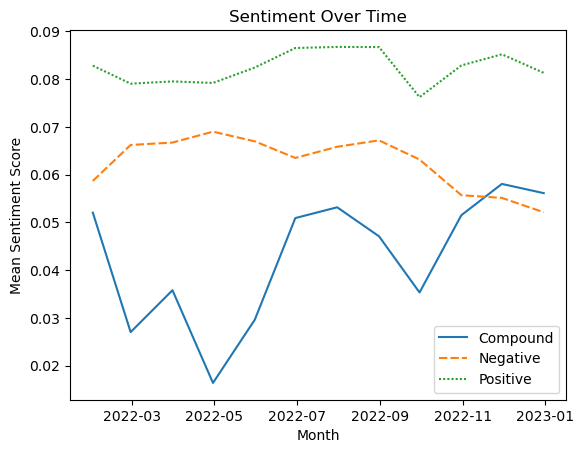

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a time series plot of the mean sentiment scores over time
sns.lineplot(data=monthly_means[['Compound','Negative', 'Positive']])#'Negative', 'Positive'
plt.title('Sentiment Over Time')
plt.xlabel('Month')
plt.ylabel('Mean Sentiment Score')
plt.show()

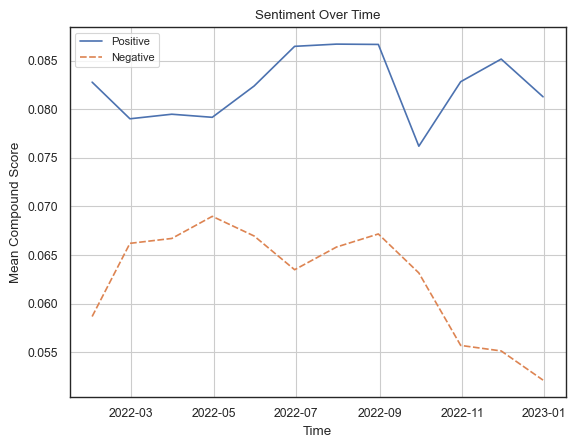

In [12]:
sns.set_theme(style='white', context='paper', palette='deep')

sns.lineplot(data=monthly_means[['Positive','Negative']])#'Negative', 'Positive'
plt.title('Sentiment Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Compound Score')

plt.grid(True)
plt.legend(loc='best', frameon=True, fontsize='small')

plt.show()

In [28]:

data.head()

,Unnamed: 0,Tweet,User Location,User Description,User Follower Count,Tweet Date,Latitude,Longitude,Subway Locations,Key,Tweet_new,Sentiment,Negative,Neutral,Positive,Compound
0,0,If i ever off myself i am 100% mentioning the ...,"Bushwick, Brooklyn",in the process of rebranding. check back 🔜,2347,2022-12-30 23:09:59+00:00,40.570842,-74.041878,[],MTA,If i ever off myself i am 100% mentioning the ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,1,IN ORDER TO SAVE LIVES WE HAVE TO EDUCATE ALL ...,New York City 🇵🇷,NYC TLC Drivers Unite to Reform The NYC TLC & ...,721,2022-12-30 22:37:08+00:00,40.683935,-74.026675,[],MTA,IN ORDER TO SAVE LIVES WE HAVE TO EDUCATE ALL ...,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.000,0.806,0.194,0.7585
2,2,"@Jvx14Solid @_colm_ @MTA No, the ones in the p...","New Brunswick, NJ/New York, NY","Rutgers '24, transit enthusiast/advocate, New ...",7532,2022-12-30 22:35:06+00:00,40.683935,-74.026675,[],MTA,"@Jvx14Solid @_colm_ @MTA No, the ones in the p...","{'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'comp...",0.081,0.919,0.000,-0.2960
3,3,Any of my followers work for PATH or MTA? I ne...,"Newark, NJ",Official PERSONAL Twitter | CEO OF #SkillszBea...,4100,2022-12-30 22:20:14+00:00,40.717135,-74.164089,[],MTA,Any of my followers work for PATH or MTA? I ne...,"{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'comp...",0.000,0.882,0.118,0.2500
4,4,Bay Ridge. (@ MTA Subway - 86th St (R) - @nyct...,NYC,📍NYC 🗽 🫰♊🔥🐯🏛️ 🛫 LA 🌴 | MDE 🇨🇴 | LDN 🇬🇧 | TPE 🇹...,300,2022-12-30 22:14:35+00:00,40.622812,-74.028383,[],MTA,Bay Ridge. (@ MTA Subway - 86th St (R) - @nyct...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


In [65]:
df.columns

Index(['User Location', 'Tweet Date', 'Latitude', 'Longitude', 'Key',
       'verdict', 'Tweet\r', 'Tweet_new', 'Negative', 'Neutral', 'Positive',
       'Compound'],
      dtype='object')

In [96]:
df = pd.read_csv('/Users/abhishek/Desktop/PSU_Courses/CE 597 Public transportation/Project/500sampled_tweets_2022.csv',delimiter=',',lineterminator='\n', encoding='utf-8')

def remove_links(tweet):
    return re.sub(r'http\S+|www\S+', '', tweet)

df['Tweet_new'] = df['Tweet\r'].apply(remove_links)

# Convert Latitude and Longitude columns to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Drop rows with non-numeric values in Latitude and Longitude columns
df['prediction\r'] = df['prediction']
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
df['prediction'] = df['prediction\r'].str.replace('\r', '')
df = df.drop(df[df['prediction'] == 'No Prediction'].index)
df = df.drop(columns=['prediction\r','Unnamed: 0','Unnamed: 1','User Follower Count','User Description','Subway Locations','geometry','index_right','prediction'])
df['Tweet Date'] = df['Tweet Date'].astype(str)
df['Tweet Date'] = df['Tweet Date'].replace('[]', pd.NaT)
df['Tweet Date'] = pd.to_datetime(df['Tweet Date'])
df.set_index('Tweet Date', inplace=True)
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return (sentiment_dict['neg'], sentiment_dict['neu'], sentiment_dict['pos'], sentiment_dict['compound'])

df[['Negative', 'Neutral', 'Positive','Compound']] = df['Tweet_new'].apply(sentiment_scores).apply(pd.Series)

# df_all.to_csv('tweets_with_sentiment_scores.csv', index=False)
print (df['Compound'].isna().sum())

df.head()
print (df.columns)

0
Index(['User Location', 'Latitude', 'Longitude', 'Key', 'verdict', 'Tweet\r',
       'Tweet_new', 'Negative', 'Neutral', 'Positive', 'Compound'],
      dtype='object')


In [87]:
df['verdict'].unique()

array(['Safety/security', 'Cleanliness', 'None of the above',
       'Punctuality'], dtype=object)

In [94]:
data_punctul = df.loc[df['verdict']=='Punctuality']
data_punctul = data_punctul.reset_index(drop=True)

data_clean = df.loc[df['verdict']=='Cleanliness']
data_clean = data_clean.reset_index(drop=True)

data_safe = df.loc[df['verdict']=='Safety/security']
data_safe = data_safe.reset_index(drop=True)
data_punctul.head()

,User Location,Latitude,Longitude,Key,verdict,Tweet\r,Tweet_new,Negative,Neutral,Positive,Compound
0,NaN,40.683935,-74.026675,train,Punctuality,@pacific_zephyr @Ian_Gay_briel @jeremyzorek Ye...,@pacific_zephyr @Ian_Gay_briel @jeremyzorek Ye...,0.154,0.813,0.033,-0.7000
1,NYC | DC,40.541722,-73.962582,train,Punctuality,"@conorsen @drewheineman Amid labor shortage, d...","@conorsen @drewheineman Amid labor shortage, d...",0.043,0.957,0.000,-0.1280
2,Brooklyn/Queens border,40.785365,-73.933612,train,Punctuality,@sIippinjimmy @brianspeaksnow oh god theyâ€™re...,@sIippinjimmy @brianspeaksnow oh god theyâ€™re...,0.000,0.781,0.219,0.4939
3,NYC,40.749937,-73.987965,subway,Punctuality,Waiting for the D train. (@ MTA Subway - 34th ...,Waiting for the D train. (@ MTA Subway - 34th ...,0.000,1.000,0.000,0.0000
4,âš¢ ðŸ“NYC,40.683935,-74.026675,train,Punctuality,One thing about the 1 train is that it always ...,One thing about the 1 train is that it always ...,0.000,0.898,0.102,0.3612


In [92]:
# data2.to_excel('tweets_schedule.xlsx', index=False)